## How to Use The Pre-Trained VGG Model to Classify Objects in Photographs

Convolutional neural networks are now capable of outperforming humans on some computer vision tasks, such as classifying images.

That is, given a photograph of an object, answer the question as to which of 1,000 specific objects the photograph shows.

A competition-winning model for this task is the VGG model by researchers at Oxford. What is important about this model, besides its capability of classifying objects in photographs, is that the model weights are freely available and can be loaded and used in your own models and applications.

In this tutorial, you will discover the VGG convolutional neural network models for image classification.

## Load the VGG Model in Keras

The VGG model can be loaded and used in the Keras deep learning library.

Keras provides an Applications interface for loading and using pre-trained models.

Using this interface, you can create a VGG model using the pre-trained weights provided by the Oxford group and use it as a starting point in your own model, or use it as a model directly for classifying images.

In this tutorial, we will focus on the use case of classifying new images using the VGG model.

Keras provides both the 16-layer and 19-layer version via the VGG16 and VGG19 classes. Let’s focus on the VGG16 model.

The model can be created as follows:

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553476096/553467096 [==============================] - 6s 0us/step


The first time you run this example, Keras will download the weight files from the Internet and store them in the ~/.keras/models directory.

Note that the weights are about 528 megabytes, so the download may take a few minutes depending on the speed of your Internet connection.

The weights are only downloaded once. The next time you run the example, the weights are loaded locally and the model should be ready to use in seconds.

We can use the standard Keras tools for inspecting the model structure.

For example, you can print a summary of the network layers as follows:

In [2]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

You can also see that, by default, the model expects images as input with the size 224 x 224 pixels with 3 channels (e.g. color).

We can also create a plot of the layers in the VGG model, as follows:

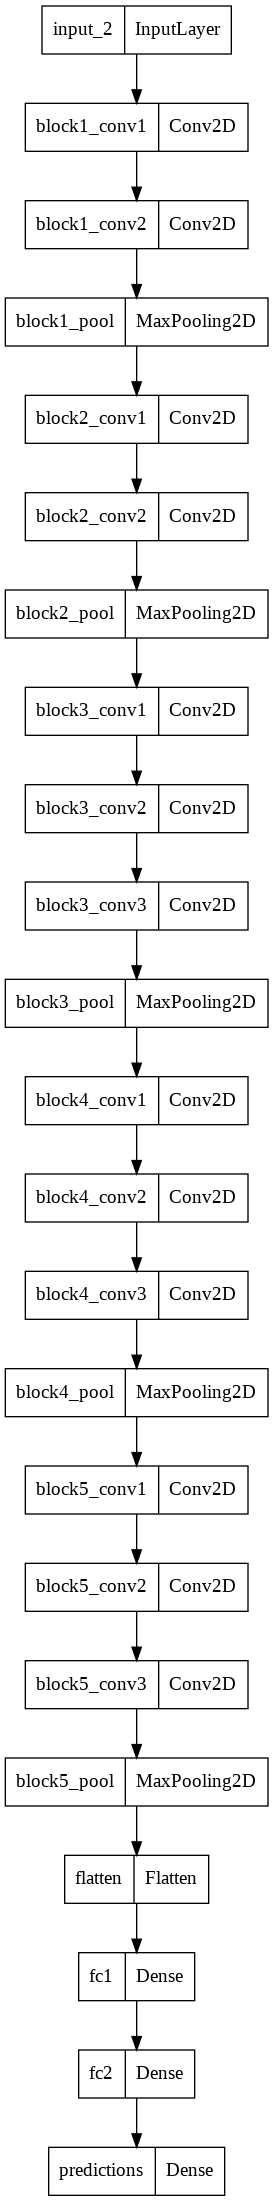

In [3]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, to_file='vgg.png')

Again, because the model is large, the plot is a little too large and perhaps unreadable. Nevertheless, it is provided below.

The VGG() class takes a few arguments that may only interest you if you are looking to use the model in your own project, e.g. for transfer learning.

For example:

include_top (True): Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.

weights (‘imagenet‘): What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.

input_tensor (None): A new input layer if you intend to fit the model on new data of a different size.

input_shape (None): The size of images that the model is expected to take if you change the input layer.

pooling (None): The type of pooling to use when you are training a new set of output layers.

classes (1000): The number of classes (e.g. size of output vector) for the model.
Next, let’s look at using the loaded VGG model to classify ad hoc photographs.

## Develop a Simple Photo Classifier

## 1. Get a Sample Image

## 2. Load the VGG Model

from keras.applications.vgg16 import VGG16

model = VGG16()

## 3. Load and Prepare Image

Next, we can load the image as pixel data and prepare it to be presented to the network.

Keras provides some tools to help with this step.

First, we can use the load_img() function to load the image and resize it to the required size of 224×224 pixels.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('/content/drive/MyDrive/dog.jpg', target_size=(224, 224))

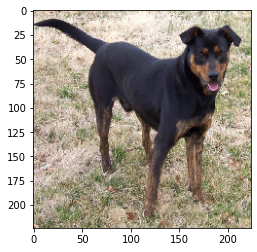

In [25]:
plt.imshow(image)

Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.

In [6]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [7]:
image.shape


(224, 224, 3)

The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.

In [8]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

Keras provides a function called preprocess_input() to prepare new input for the network.

In [9]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

## 4. Make a Prediction

We can call the predict() function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [10]:
# predict the probability across all output classes
yhat = model.predict(image)

Nearly there, now we need to interpret the probabilities.

## 5. Interpret Prediction

Keras provides a function to interpret the probabilities called decode_predictions().

It can return a list of classes and their probabilities in case you would like to present the top 3 objects that may be in the photo.

We will just report the first most likely object.

In [11]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
Doberman (35.42%)


## Complete Example

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load the model
model = VGG16()

# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

# **ResNet**

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot as plt



In [13]:
model = ResNet50(weights='imagenet')

print(model.summary())

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

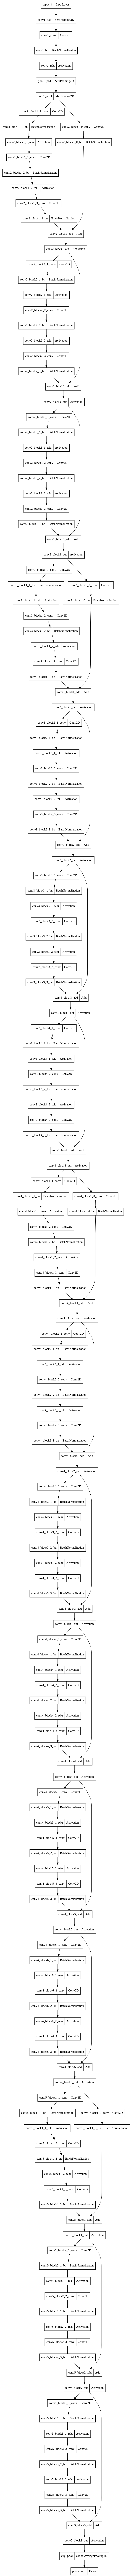

In [14]:
from keras.utils.vis_utils import plot_model
model = ResNet50()
plot_model(model, to_file='ResNet50.png')

In [15]:
img = image.load_img('/content/drive/MyDrive/dog.jpg', target_size=(224, 224))

In [16]:
x = image.img_to_array(img)

In [17]:
x = np.expand_dims(x, axis=0)

In [18]:
x = preprocess_input(x)

In [19]:
preds = model.predict(x)

In [20]:
preds.shape

(1, 1000)

The object in the image is:  kelpie
with a confidence of  0.5118198


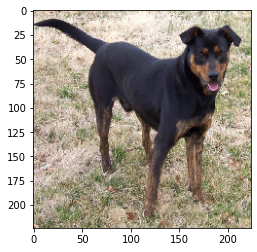

In [21]:
plt.imshow(img)
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

In [22]:
final_prediction

[[('n02105412', 'kelpie', 0.5118198),
  ('n02107142', 'Doberman', 0.15323815),
  ('n02089078', 'black-and-tan_coonhound', 0.12139766),
  ('n02106550', 'Rottweiler', 0.07712113),
  ('n02107312', 'miniature_pinscher', 0.02547513)]]